# Onderzoeksobjectief 3: Het analyseren van de invloed van comment-sentiment op het bereik van video's

Tot slot wil dit onderzoek nagaan of video's met overwegend positieve comments beter presteren in termen van views. Kornfield et al. (2015) tonen aan dat comments een rol spelen in de perceptie van het YouTube-zoekalgoritme door gebruikers. Daarnaast suggereren Chen en Feng (2024) dat positieve reacties de geloofwaardigheid en aantrekkelijkheid van een video kunnen verhogen, wat een effect kan hebben op het algoritme en de verspreiding van de video.

**Onderzoeksvraag: Heeft het sentiment van comments een invloed op het aantal views?**

In [47]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
# Get the data from the previous step
videos = pd.read_excel('../output/videos.xlsx')
comments = pd.read_excel('../output/comments.xlsx')

## Data Exploratie

### Video's

In [49]:
# Sample data
videos.head()

,id,title,publish_date,duration,views,likes,dislikes,shares,comments,engagement,...,comments_2w,comments_1m,comments_2m,comments_3m,engagement_rate_24h,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m
0,yan_6zQUIxg,Kan je een vallende ster voorspellen?,2024-09-01T08:00:40Z,10:41,3099,116,1,51,28,6.26,...,25,25,25,25,10.23,7.90,7.25,6.79,6.53,6.43
1,Gg4EbXPQx5A,Hoe kan je zijn wie je echt bent? #dewarmsteweek,2021-12-20T15:00:15Z,15:33,18982,263,8,653,8,4.83,...,9,10,11,11,6.35,5.21,5.10,5.28,5.23,5.18
2,wlp4sxJv2ZA,Is kernfusie de energiebron van de toekomst?,2021-02-04T15:00:21Z,15:43,19394,155,17,242,15,2.04,...,11,11,11,12,3.65,2.00,2.18,2.19,2.42,2.48
3,yA9m1rrgw5Y,CORONA: Waarom is het zo moeilijk om te zeggen...,2020-04-09T16:00:34Z,1:25,3832,29,5,33,1,1.51,...,2,2,2,2,3.71,2.62,2.29,2.11,1.94,1.87
4,AM3xRmezvdw,Kan je proper zijn zonder zeep?,2023-12-17T06:30:03Z,8:45,28102,184,6,115,7,1.07,...,4,4,4,4,3.47,0.72,0.70,0.71,0.75,0.79


In [50]:
# Check number of rows and columns
videos.shape

(496, 46)

In [51]:
# Check data types for each column
videos.dtypes

id                      object
title                   object
publish_date            object
duration                object
views                    int64
likes                    int64
dislikes                 int64
shares                   int64
comments                 int64
engagement             float64
views_24h                int64
views_1w                 int64
views_2w                 int64
views_1m                 int64
views_2m                 int64
views_3m                 int64
likes_24h                int64
likes_1w                 int64
likes_2w                 int64
likes_1m                 int64
likes_2m                 int64
likes_3m                 int64
dislikes_24h             int64
dislikes_1w              int64
dislikes_2w              int64
dislikes_1m              int64
dislikes_2m              int64
dislikes_3m              int64
shares_24h               int64
shares_1w                int64
shares_2w                int64
shares_1m                int64
shares_2

In [52]:
# Check for missing values
videos.isnull().sum()

id                     0
title                  0
publish_date           0
duration               0
views                  0
likes                  0
dislikes               0
shares                 0
comments               0
engagement             0
views_24h              0
views_1w               0
views_2w               0
views_1m               0
views_2m               0
views_3m               0
likes_24h              0
likes_1w               0
likes_2w               0
likes_1m               0
likes_2m               0
likes_3m               0
dislikes_24h           0
dislikes_1w            0
dislikes_2w            0
dislikes_1m            0
dislikes_2m            0
dislikes_3m            0
shares_24h             0
shares_1w              0
shares_2w              0
shares_1m              0
shares_2m              0
shares_3m              0
comments_24h           0
comments_1w            0
comments_2w            0
comments_1m            0
comments_2m            0
comments_3m            0


### Comments

In [53]:
# Sample data
comments.head()

,Unnamed: 0,id,comment_id,parent_comment_id,author,published_at,like_count,comment_nl,is_reply,en_google,en_deepl
0,0,yan_6zQUIxg,UgywvSy7jh5Z-u5zIWd4AaABAg,NaN,User1,2024-09-03T20:48:41Z,0,🌚🌚🌚🌚Super interessant!,False,🌚🌚🌚🌚Super interesting!,🌚🌚🌚🌚Super interesting!
1,1,yan_6zQUIxg,UgwVO27fhz-QFdEIATN4AaABAg,NaN,User2,2024-09-02T10:17:54Z,0,"Wat een getalenteerd duo! Meer van dit, Univer...",False,"What a talented duo! More of this, University ...","What a talented duo! More of this, University ..."
2,2,yan_6zQUIxg,UgzygMPkH5pffJv91kp4AaABAg,NaN,User3,2024-09-01T21:42:04Z,0,Zo interessant!!! 🤓,False,So interesting !!! 🤓,So interesting!!! 🤓
3,3,yan_6zQUIxg,UgzaNQ1Ec_9RdYCBijt4AaABAg,NaN,User4,2024-09-01T21:39:13Z,0,Zoveel nieuwe dingen geleerd!!,False,Learned so many new things !!,So many new things learned!!!
4,4,yan_6zQUIxg,UgyGW4znhNjrdGCiqbh4AaABAg,NaN,User4,2024-09-01T21:38:25Z,0,NaN,False,NaN,NaN


In [54]:
# Check number of rows and columns
comments.shape

(7453, 11)

In [55]:
# Check data types for each column
comments.dtypes

Unnamed: 0            int64
id                   object
comment_id           object
parent_comment_id    object
author               object
published_at         object
like_count            int64
comment_nl           object
is_reply               bool
en_google            object
en_deepl             object
dtype: object

In [56]:
# Check for missing values
comments.isnull().sum()

Unnamed: 0              0
id                      0
comment_id              0
parent_comment_id    4536
author                  0
published_at            0
like_count              0
comment_nl              5
is_reply                0
en_google              51
en_deepl                8
dtype: int64

## Sentiment berekenen met VADER

In [57]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

In [58]:
# Calculate sentiment scores for Deepl translated comments
comments['sentiment_deepl'] = comments['en_deepl'].apply(
    lambda x: analyzer.polarity_scores(x)['compound'] if isinstance(x, str) else np.nan
)

In [59]:
# Check if Google translation exists and calculate or skip
comments['sentiment_google'] = comments.apply(
    lambda row: analyzer.polarity_scores(row['en_google'])['compound']
    if isinstance(row['en_google'], str) else np.nan,
    axis=1
)

In [60]:
# Classify sentiment
def classify_sentiment(score):
    if pd.isna(score):
        return np.nan
    elif score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

comments['category_deepl'] = comments['sentiment_deepl'].apply(classify_sentiment)
comments['category_google'] = comments['sentiment_google'].apply(classify_sentiment)

In [61]:
# Determine final category + exclusion reason
def determine_final_category(row):
    if pd.isna(row['category_google']):
        return row['category_deepl']
    elif row['category_deepl'] == row['category_google']:
        return row['category_deepl']
    else:
        return np.nan  # exclude if mismatch

def determine_exclusion_reason(row):
    if pd.isna(row['category_google']) and pd.notna(row['category_deepl']):
        return 'no_google'
    elif pd.notna(row['category_deepl']) and pd.notna(row['category_google']) and row['category_deepl'] != row['category_google']:
        return 'mismatch'
    else:
        return np.nan

comments['sentiment_category'] = comments.apply(determine_final_category, axis=1)
comments['exclusion_reason'] = comments.apply(determine_exclusion_reason, axis=1)

In [62]:
# Report filtering
total_comments = len(comments)
kept_comments = comments['sentiment_category'].notnull().sum()
excluded_comments = total_comments - kept_comments

# Count exclusion reasons
excluded_counts = comments['exclusion_reason'].value_counts()

print(f"Totaal aantal comments: {total_comments}")
print(f"Aantal opgenomen comments: {kept_comments}")
print(f"Aantal uitgesloten comments totaal: {excluded_comments}")
print(f"Waarvan door mismatch: {excluded_counts.get('mismatch', 0)}")
print(f"Waarvan door ontbrekende Google-vertaling: {excluded_counts.get('no_google', 0)}")

Totaal aantal comments: 7453
Aantal opgenomen comments: 6505
Aantal uitgesloten comments totaal: 948
Waarvan door mismatch: 940
Waarvan door ontbrekende Google-vertaling: 46


In [63]:
# Filter dataset for further analysis
comments_clean = comments[comments['sentiment_category'].notnull()].copy()
print(f"Shape of clean comments dataset: {comments_clean.shape}")
comments_clean.head()

Shape of clean comments dataset: (6505, 17)


,Unnamed: 0,id,comment_id,parent_comment_id,author,published_at,like_count,comment_nl,is_reply,en_google,en_deepl,sentiment_deepl,sentiment_google,category_deepl,category_google,sentiment_category,exclusion_reason
0,0,yan_6zQUIxg,UgywvSy7jh5Z-u5zIWd4AaABAg,NaN,User1,2024-09-03T20:48:41Z,0,🌚🌚🌚🌚Super interessant!,False,🌚🌚🌚🌚Super interesting!,🌚🌚🌚🌚Super interesting!,0.4574,0.4574,positive,positive,positive,NaN
1,1,yan_6zQUIxg,UgwVO27fhz-QFdEIATN4AaABAg,NaN,User2,2024-09-02T10:17:54Z,0,"Wat een getalenteerd duo! Meer van dit, Univer...",False,"What a talented duo! More of this, University ...","What a talented duo! More of this, University ...",0.5562,0.5562,positive,positive,positive,NaN
2,2,yan_6zQUIxg,UgzygMPkH5pffJv91kp4AaABAg,NaN,User3,2024-09-01T21:42:04Z,0,Zo interessant!!! 🤓,False,So interesting !!! 🤓,So interesting!!! 🤓,0.3379,0.3411,positive,positive,positive,NaN
3,3,yan_6zQUIxg,UgzaNQ1Ec_9RdYCBijt4AaABAg,NaN,User4,2024-09-01T21:39:13Z,0,Zoveel nieuwe dingen geleerd!!,False,Learned so many new things !!,So many new things learned!!!,0.0000,0.0000,neutral,neutral,neutral,NaN
5,5,yan_6zQUIxg,UgynTpj3jPUnnMJ95IZ4AaABAg,NaN,User5,2024-09-01T15:26:51Z,1,Wat een interessante uiteenzetting! Fijne mont...,False,What an interesting explanation! Nice assembly...,"What an interesting account! Fine editing, the...",0.8065,0.8513,positive,positive,positive,NaN


## Data voorbereiden voor analyse

In [64]:
# Calculate average sentiment per video
avg_sentiment_per_video = comments_clean.groupby('id')['sentiment_deepl'].mean().reset_index()
avg_sentiment_per_video.rename(columns={'sentiment_deepl': 'avg_sentiment'}, inplace=True)

# Calculate counts per sentiment category per video
sentiment_counts_per_video = comments_clean.groupby(['id', 'sentiment_category']).size().unstack(
    fill_value=0).reset_index()

# Ensure we have all sentiment categories (even if none exist)
for category in ['positive', 'neutral', 'negative']:
    if category not in sentiment_counts_per_video.columns:
        sentiment_counts_per_video[category] = 0

# Reset videos dataframe - remove any duplicate columns before merging
for col in ['avg_sentiment', 'positive', 'neutral', 'negative']:
    if col in videos.columns:
        videos = videos.drop(col, axis=1)

# Merge with videos dataframe
videos = videos.merge(avg_sentiment_per_video, on='id', how='left')
videos = videos.merge(sentiment_counts_per_video, on='id', how='left')

# Fill NaNs (in case videos have no comments after filtering) with 0
videos['avg_sentiment'] = videos['avg_sentiment'].fillna(0)
videos[['positive', 'neutral', 'negative']] = videos[['positive', 'neutral', 'negative']].fillna(0)

# Log-transform views (add 1 to avoid log(0))
videos['log_views'] = np.log(videos['views'] + 1)

# Check the final dataset
print(f"Videos dataset shape: {videos.shape}")
print(f"Missing values in avg_sentiment: {videos['avg_sentiment'].isna().sum()}")
print(f"Missing values in log_views: {videos['log_views'].isna().sum()}")
videos[['id', 'avg_sentiment', 'views', 'log_views']].head()

Videos dataset shape: (496, 51)
Missing values in avg_sentiment: 0
Missing values in log_views: 0


,id,avg_sentiment,views,log_views
0,yan_6zQUIxg,0.553367,3099,8.039157
1,Gg4EbXPQx5A,0.146086,18982,9.851299
2,wlp4sxJv2ZA,0.314731,19394,9.872771
3,yA9m1rrgw5Y,0.440400,3832,8.251403
4,AM3xRmezvdw,-0.020567,28102,10.243632


## Beschrijvende statistieken

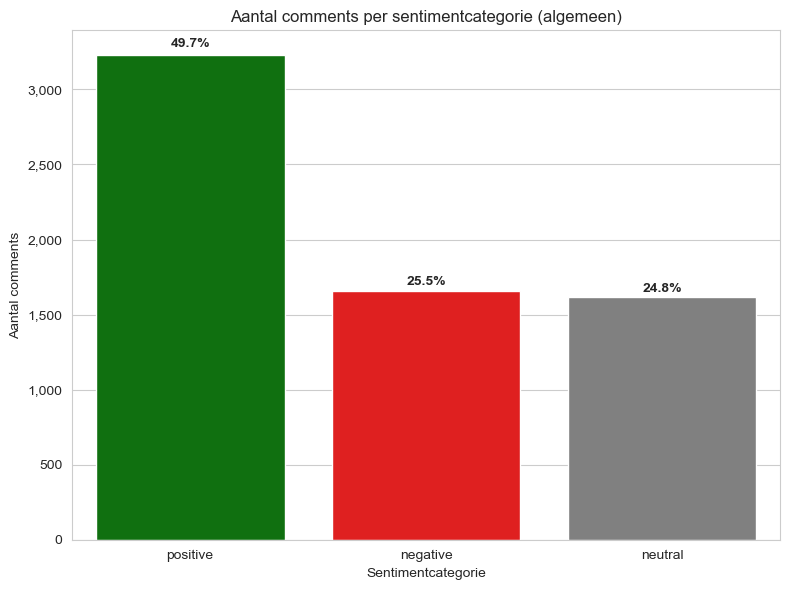

In [65]:
# Count total number of comments per sentiment category
overall_sentiment_counts = comments_clean['sentiment_category'].value_counts()

# Calculate percentages
overall_sentiment_percentages = overall_sentiment_counts / overall_sentiment_counts.sum() * 100

# Create DataFrame for plotting
sentiment_df = overall_sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment_category', 'count']
sentiment_df['percentage'] = sentiment_df['count'] / sentiment_df['count'].sum() * 100

# Define color mapping
color_mapping = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Plot barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='sentiment_category',
    y='count',
    data=sentiment_df,
    palette=color_mapping,
    hue='sentiment_category',
)

# Add percentage labels on top of bars
for i, row in sentiment_df.iterrows():
    ax.text(
        i, row['count'] + row['count'] * 0.01,
        f"{row['percentage']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Format y-axis with 1,000 separator
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set titles and labels
plt.title('Aantal comments per sentimentcategorie (algemeen)')
plt.xlabel('Sentimentcategorie')
plt.ylabel('Aantal comments')

plt.tight_layout()
plt.show()

In [66]:
# Summary statistics for sentiment and views
print("Gemiddeld sentiment per video:")
print(videos['avg_sentiment'].describe())

print("\nAantal positieve, neutrale, negatieve comments per video:")
print(videos[['positive', 'neutral', 'negative']].describe())

Gemiddeld sentiment per video:
count    496.000000
mean       0.180740
std        0.266664
min       -0.982700
25%        0.000000
50%        0.157294
75%        0.349608
max        0.873100
Name: avg_sentiment, dtype: float64

Aantal positieve, neutrale, negatieve comments per video:
         positive     neutral    negative
count  496.000000  496.000000  496.000000
mean     6.514113    3.256048    3.344758
std     14.025511    7.260865    8.884676
min      0.000000    0.000000    0.000000
25%      1.000000    0.000000    0.000000
50%      3.000000    1.000000    1.000000
75%      7.000000    3.000000    3.000000
max    182.000000   71.000000   98.000000


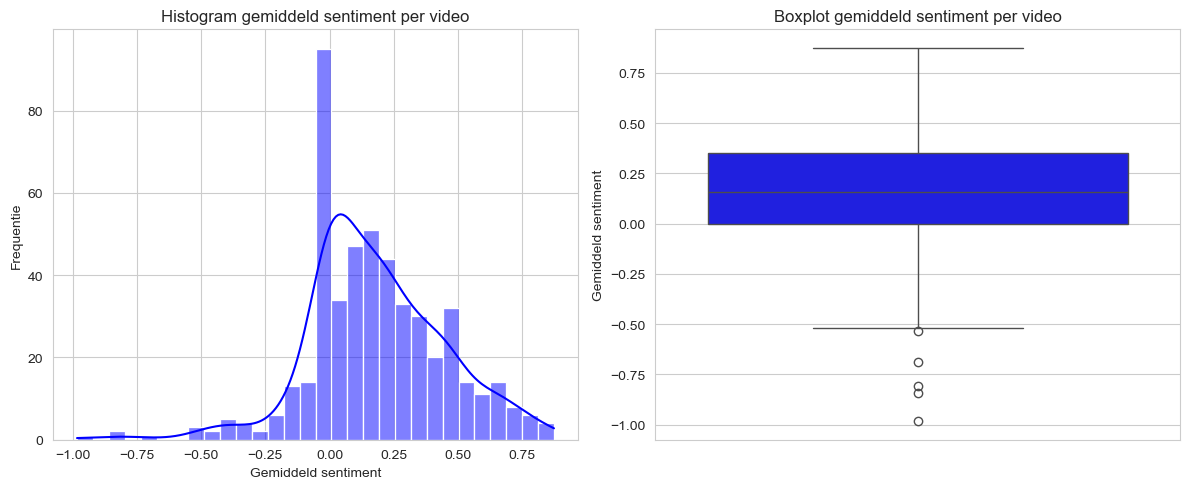

In [67]:
# Histogram + boxplot average sentiment
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(videos['avg_sentiment'], bins=30, kde=True, color='blue')
plt.title('Histogram gemiddeld sentiment per video')
plt.xlabel('Gemiddeld sentiment')
plt.ylabel('Frequentie')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=videos['avg_sentiment'], color='blue')
plt.title('Boxplot gemiddeld sentiment per video')
plt.ylabel('Gemiddeld sentiment')

plt.tight_layout()
plt.show()

**Beschrijving van de verdeling van het gemiddeld sentiment per video**

De verdeling van het gemiddeld sentiment per video toont een scheve verdeling naar rechts, met de meeste video's tussen ongeveer 0 en 0,3. De histogram maakt duidelijk dat het merendeel van de video's overwegend neutrale tot licht positieve reacties ontvangt. Slechts een beperkt aantal video's vertoont een gemiddeld sentiment onder nul.

De boxplot bevestigt dit beeld: de mediaan ligt rond 0,2 en er zijn enkele video's met uitgesproken negatieve gemiddelde sentimentscores (tot -1,0). Uitschieters naar boven zijn nauwelijks zichtbaar, wat erop wijst dat zeer positieve video's zeldzaam zijn.

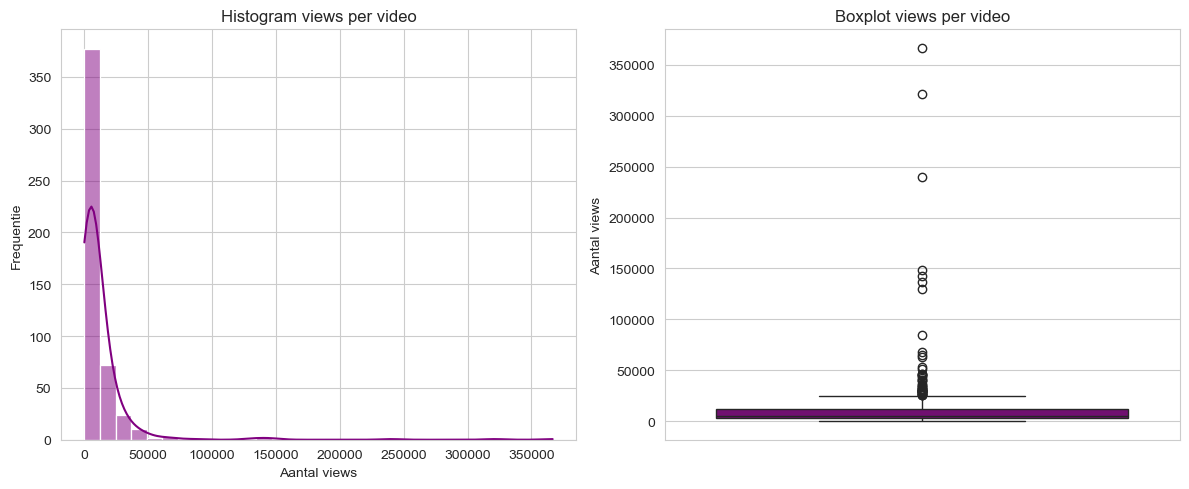

In [68]:
# Histogram + boxplot views
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(videos['views'], bins=30, kde=True, color='purple')
plt.title('Histogram views per video')
plt.xlabel('Aantal views')
plt.ylabel('Frequentie')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=videos['views'], color='purple')
plt.title('Boxplot views per video')
plt.ylabel('Aantal views')

plt.tight_layout()
plt.show()

**Beschrijving van de verdeling van views per video**

Het histogram van het aantal views per video toont een uitgesproken scheve verdeling naar rechts. De meeste video's behalen minder dan 50.000 views, met een piek bij lage aantallen. Er zijn enkele video's die extreem veel views genereren, tot meer dan 350.000, wat kenmerkend is voor virale content.

De boxplot benadrukt deze scheefheid nogmaals: de mediaan ligt relatief laag, terwijl er een groot aantal uitschieters aanwezig is in de dataset. Deze uitschieters wijzen op video's die aanzienlijk populairder zijn dan het gemiddelde. Een log-transformatie van de views is daarom aanbevolen om deze scheefheid te corrigeren bij verdere analyses.

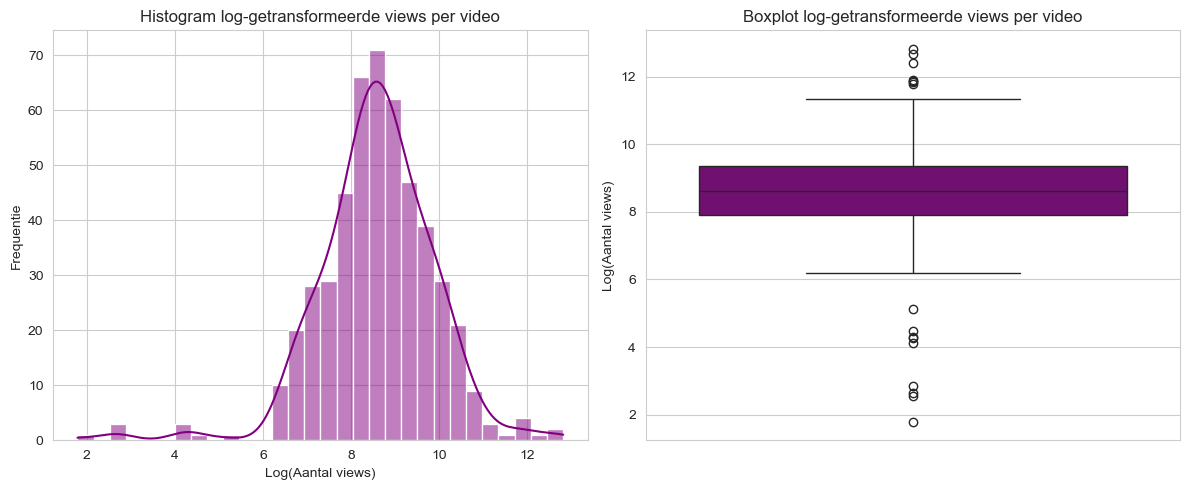

In [69]:
# Histogram + boxplot log-transformed views
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(videos['log_views'], kde=True, color='purple', bins=30)
plt.title('Histogram log-getransformeerde views per video')
plt.xlabel('Log(Aantal views)')
plt.ylabel('Frequentie')
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=videos['log_views'], color='purple')
plt.title('Boxplot log-getransformeerde views per video')
plt.ylabel('Log(Aantal views)')

plt.tight_layout()
plt.show()

**Beschrijving van de verdeling van log-getransformeerde views per video**

De log-transformatie van het aantal views per video heeft duidelijk zijn effect gehad: de verdeling is nu veel symmetrischer en benadert een normale verdeling. Waar de oorspronkelijke views-data extreem scheef verdeeld was, toont de log-transformatie een klokvormige verdeling met het zwaartepunt rond log(views) = 8 à 9. Dit komt overeen met video's die enkele duizenden tot tienduizenden views behalen.

De boxplot laat zien dat de uitschieters nog steeds aanwezig zijn, maar minder extreem afwijken dan in de oorspronkelijke schaal. De interkwartielafstand is compacter, wat aantoont dat de log-transformatie de data gestabiliseerd heeft. Deze transformatie is dus geschikt gebleken om te voldoen aan de aannames voor verdere parametertests zoals lineaire regressie.

## Normaliteitstest (Shapiro-Wilk)

In [70]:
# Shapiro-Wilk test for normality
# Dropping any NaN values before testing
valid_sentiment = videos['avg_sentiment'].dropna()
valid_log_views = videos['log_views'].dropna()

# Shapiro-Wilk test for average sentiment
shapiro_sentiment = stats.shapiro(valid_sentiment)
print(f'Shapiro-Wilk avg_sentiment: statistic={shapiro_sentiment.statistic:.4f}, p-value={shapiro_sentiment.pvalue:.4f}')

# Shapiro-Wilk test for log-transformed views
shapiro_views = stats.shapiro(valid_log_views)
print(f'Shapiro-Wilk log_views: statistic={shapiro_views.statistic:.4f}, p-value={shapiro_views.pvalue:.4f}')

Shapiro-Wilk avg_sentiment: statistic=0.9662, p-value=0.0000
Shapiro-Wilk log_views: statistic=0.9464, p-value=0.0000


**Resultaten van de Shapiro-Wilk-test voor normaliteit**

Om te beoordelen of de data normaal verdeeld is, werd de Shapiro-Wilk-test toegepast op zowel het gemiddeld sentiment per video als op de log-getransformeerde views.

- **Gemiddeld sentiment:** statistic = 0.9662, *p*-waarde = 0.0000
- **Log-getransformeerde views:** statistic = 0.9464, *p*-waarde = 0.0000

Beide *p*-waarden zijn kleiner dan 0.05, wat betekent dat de nulhypothese van normaliteit verworpen wordt. Dit wijst erop dat zowel het gemiddeld sentiment als de log-getransformeerde views significant afwijken van een normale verdeling. Hoewel de log-transformatie de verdeling van views aanzienlijk heeft verbeterd (visueel waarneembaar in het histogram), blijft de verdeling statistisch niet normaal. Daarom worden in verdere analyses zowel parametertests als robuustere non-parametrische methodes toegepast om betrouwbare resultaten te waarborgen.

## Correlatie-analyse

In [71]:
# Create regression dataset by dropping rows with NaN values in key columns
regression_data = videos.dropna(subset=['avg_sentiment', 'log_views']).copy()
print(f"Original data shape: {videos.shape}")
print(f"Regression data shape after removing NaNs: {regression_data.shape}")

# Spearman correlation (non-parametric, doesn't require normality)
spearman_corr, spearman_p = stats.spearmanr(regression_data['avg_sentiment'], regression_data['log_views'])
print(f'Spearman correlation: rho={spearman_corr:.4f}, p-value={spearman_p:.4f}')

# Pearson correlation (parametric, assumes normality)
pearson_corr, pearson_p = stats.pearsonr(regression_data['avg_sentiment'], regression_data['log_views'])
print(f'Pearson correlation: r={pearson_corr:.4f}, p-value={pearson_p:.4f}')

Original data shape: (496, 51)
Regression data shape after removing NaNs: (496, 51)
Spearman correlation: rho=0.1466, p-value=0.0011
Pearson correlation: r=0.1208, p-value=0.0071


**Resultaten van de correlatieanalyse**

Om de relatie tussen het gemiddeld sentiment en het aantal views per video te onderzoeken, werden zowel een Spearman- als een Pearson-correlatie berekend.

- **Spearman-correlatie (niet-parametrisch):** rho = 0.1466, *p*-waarde = 0.0011
- **Pearson-correlatie (parametrisch):** r = 0.1208, *p*-waarde = 0.0071

Beide correlaties zijn positief en statistisch significant (*p* < 0.05), wat erop wijst dat video's met een hoger gemiddeld sentiment gemiddeld genomen ook meer views genereren. De correlatiecoëfficiënten (~0.12–0.15) wijzen echter op een zwakke samenhang: het effect van sentiment op views is aanwezig, maar beperkt in sterkte.

Gezien de Shapiro-Wilk-test eerder heeft aangetoond dat de variabelen niet normaal verdeeld zijn, dient de Spearman-correlatie als robuuster bewijs voor deze relatie.

## Lineaire regressie

In [83]:
# Prepare data for regression
X = sm.add_constant(regression_data['avg_sentiment'])
y = regression_data['log_views']

# Fit OLS regression
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.316
Date:                Sat, 10 May 2025   Prob (F-statistic):            0.00707
Time:                        10:34:05   Log-Likelihood:                -832.62
No. Observations:                 496   AIC:                             1669.
Df Residuals:                     494   BIC:                             1678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.4769      0.070    120.249      0.000       8.338       8.615
avg_sentiment     0.5923      0.219      2.705      0.007       0.162       1.023
==============================================================================
Omnibus:                       84.858   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.633
Skew:                          -0.717   Prob(JB):                     1.60e-72
Kurtosis:                       6.734   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Resultaten van de lineaire regressieanalyse**

Een lineaire regressieanalyse werd uitgevoerd om het effect van het gemiddeld sentiment op het aantal views (log-getransformeerd) te onderzoeken. De resultaten zijn als volgt:

- **Gemiddeld sentiment:** B = 0.5923, SE = 0.219, *t*(494) = 2.705, *p* = 0.007
- **Intercept:** B = 8.4769, SE = 0.070, *t*(494) = 120.249, *p* < 0.001
- **Model fit:** R² = 0.015, *F*(1, 494) = 7.316, *p* = 0.007

Het gemiddeld sentiment heeft een positief en significant effect op het aantal views: een stijging van 1 eenheid in sentiment is geassocieerd met een toename van 0.59 in log-views (*p* = 0.007). Dit effect is echter beperkt van omvang: het model verklaart slechts ~1,5% van de variantie in log-views, wat wijst op een zwakke voorspellende kracht.

De diagnostische statistieken (Omnibus-test, Jarque-Bera-test) tonen aan dat de residuen niet normaal verdeeld zijn (skewness = -0.717, kurtosis = 6.734). Ondanks de significante resultaten moet het model met voorzichtigheid geïnterpreteerd worden gezien de beperkte verklaringskracht en schendingen van de assumpties.

## Residuen-analyse

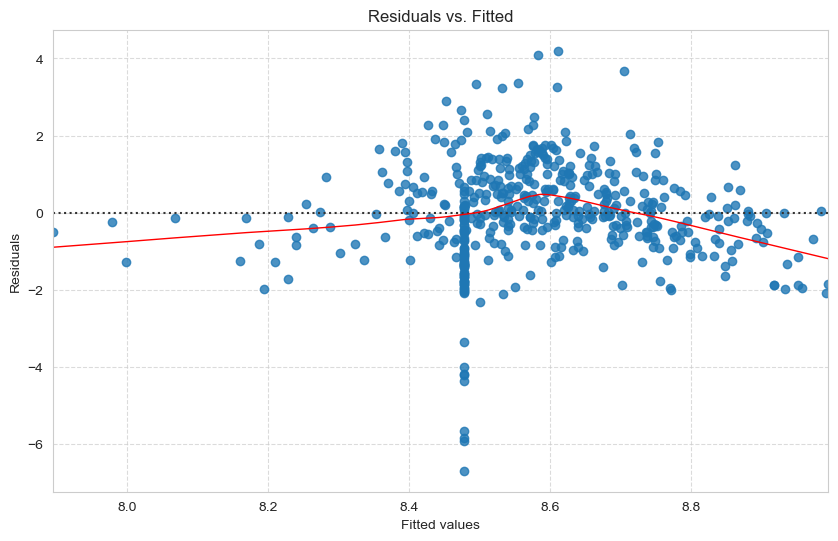

In [73]:
# Calculate residuals
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs. fitted
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Diagnostiek van de residuen: Residuals vs. Fitted-plot**

De residuals vs. fitted-plot toont de relatie tussen de voorspelde waarden en de residuen van het regressiemodel. Idealiter vertonen de residuen een willekeurig patroon rond de nul-lijn, zonder duidelijke structuur, wat wijst op homoscedasticiteit (gelijke variantie van de fouten) en lineariteit.

In deze plot is te zien dat de spreiding rond de nul-lijn grotendeels willekeurig is, maar er lijkt een lichte kromming aanwezig (zoals geïllustreerd door de rode LOWESS-lijn). Dit wijst op mogelijke afwijkingen van de lineaire assumptie. Bovendien is er een grotere spreiding van de residuen bij hogere voorspelde waarden, wat kan duiden op lichte heteroscedasticiteit. Hoewel deze afwijkingen niet extreem zijn, geven ze aan dat het model niet perfect aan de assumpties voldoet en dat de resultaten met enige voorzichtigheid moeten worden geïnterpreteerd.

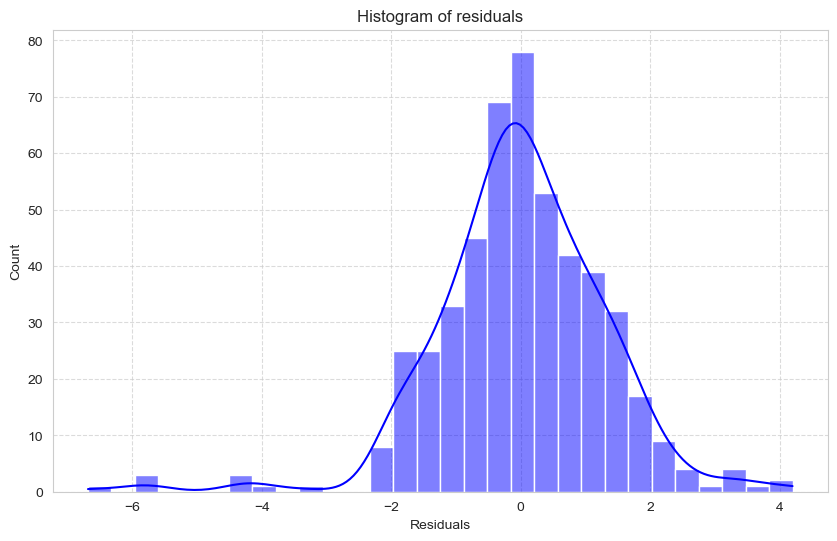

In [74]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Diagnostiek van de residuen: Histogram van de residuen**

Het histogram van de residuen geeft een indicatie van de normaliteit van de foutentermen in het regressiemodel. Een goede regressieassumptie vereist dat de residuen normaal verdeeld zijn rond nul.

In deze plot is zichtbaar dat de residuen globaal een klokvormig patroon vertonen, maar dat er lichte asymmetrie is met een langere linkerstaar. Dit wijst op negatieve skewness, wat in lijn is met de diagnostische statistieken uit het regressiemodel (skewness = -0.717). Hoewel de centrale verdeling redelijk normaal lijkt, zijn er ook enkele uitschieters zichtbaar aan beide zijden. Dit bevestigt de eerdere bevindingen dat de normaliteitsassumptie niet volledig wordt gehaald, wat de interpretatie van het model enigszins beperkt.

<Figure size 1000x600 with 0 Axes>

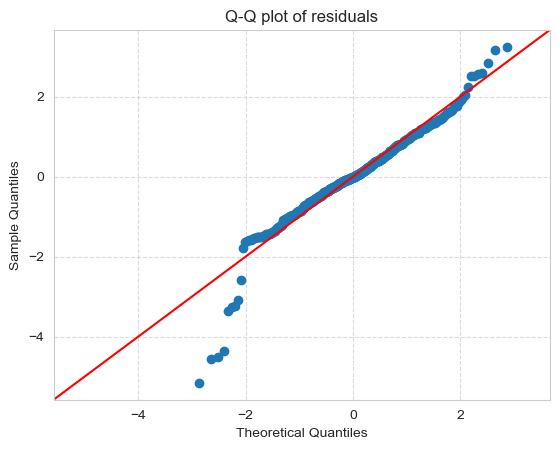

In [75]:
# Q-Q plot of residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Diagnostiek van de residuen: Q-Q-plot van de residuen**

De Q-Q-plot vergelijkt de kwantielen van de residuen met een theoretische normale verdeling. Wanneer de residuen normaal verdeeld zijn, liggen de punten dicht tegen de rode 45°-lijn.

In deze plot volgen de meeste punten de diagonale lijn vrij goed binnen het centrale gebied, maar er zijn duidelijke afwijkingen in de staarten: vooral aan de onderkant wijken de residuen aanzienlijk af van de lijn. Dit bevestigt de bevindingen uit het histogram en de regressiediagnostiek (skewness en kurtosis) dat de residuen afwijken van perfecte normaliteit, met name door uitschieters en zwaardere staarten. Dit betekent dat voorzichtigheid geboden is bij het interpreteren van inferentiële statistieken die de normaliteitsassumptie vereisen.

/var/folders/rg/6dz_349s4fs1rhcghq4lk7340000gr/T/ipykernel_4387/970872680.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/rg/6dz_349s4fs1rhcghq4lk7340000gr/T/ipykernel_4387/970872680.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


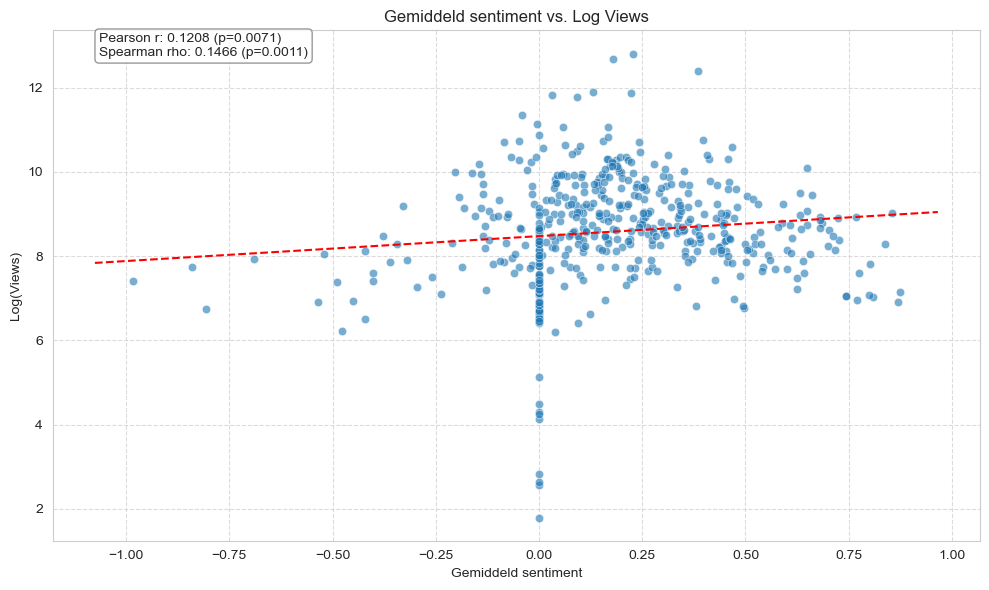

In [76]:
# Scatter plot of sentiment vs. log views with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_sentiment', y='log_views', data=regression_data, alpha=0.6)
plt.title('Gemiddeld sentiment vs. Log Views')
plt.xlabel('Gemiddeld sentiment')
plt.ylabel('Log(Views)')

# Add regression line
slope = model.params[1]
intercept = model.params[0]
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='red')

# Add annotation with correlation coefficients
plt.annotate(f'Pearson r: {pearson_corr:.4f} (p={pearson_p:.4f})\nSpearman rho: {spearman_corr:.4f} (p={spearman_p:.4f})',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Scatterplot van gemiddeld sentiment vs. log-getransformeerde views**

De scatterplot toont de relatie tussen het gemiddeld sentiment en het log-getransformeerde aantal views per video. De rode regressielijn geeft het lineaire verband weer, met een lichte positieve helling. Dit duidt op een zwakke, maar positieve relatie: video's met een hoger gemiddeld sentiment neigen naar een hoger aantal views.

De annotatie toont de correlatiecoëfficiënten:

- **Pearson-correlatie:** r = 0.1208 (*p* = 0.0071)
- **Spearman-correlatie:** rho = 0.1466 (*p* = 0.0011)

Beide correlaties zijn significant (*p* < 0.05), maar de correlatiecoëfficiënten wijzen op een beperkte sterkte van de relatie. De spreiding van de punten laat bovendien zien dat er veel variabiliteit is: video's met vergelijkbare sentimentscores kunnen nog steeds sterk uiteenlopende aantallen views behalen.

Aantal video's per sentimentcategorie:
sentiment_category
overwegend_neutraal    300
overwegend_positief    176
overwegend_negatief     20
Name: count, dtype: int64


/var/folders/rg/6dz_349s4fs1rhcghq4lk7340000gr/T/ipykernel_4387/1019255717.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=videos,


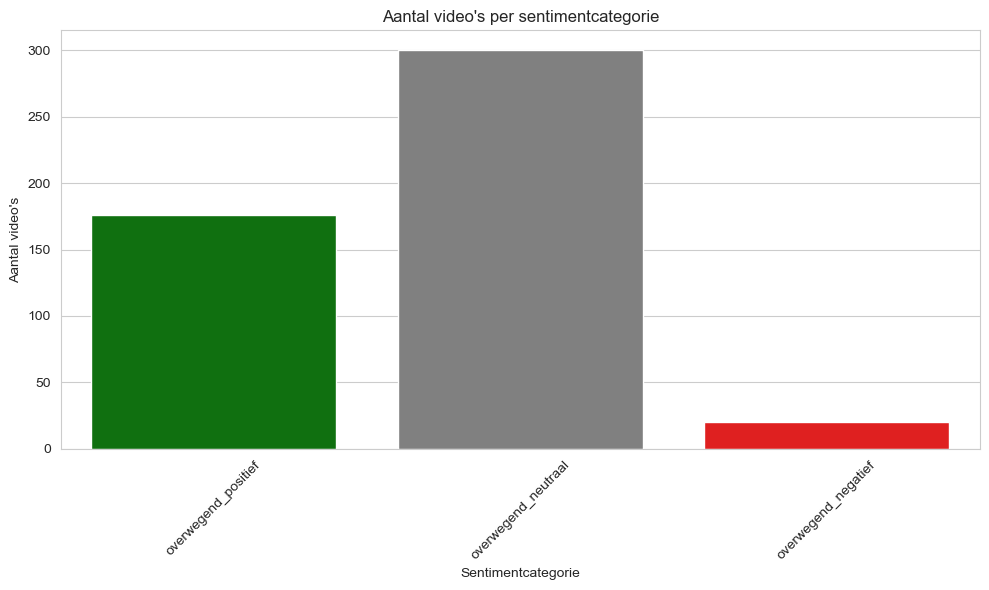

In [77]:
# Categoriseer video's op basis van gemiddeld sentiment
def categorize_video_sentiment(avg_sentiment):
    if avg_sentiment >= 0.25:  # U kunt deze drempelwaarden aanpassen
        return 'overwegend_positief'
    elif avg_sentiment <= -0.25:
        return 'overwegend_negatief'
    else:
        return 'overwegend_neutraal'

videos['sentiment_category'] = videos['avg_sentiment'].apply(categorize_video_sentiment)

# Tel het aantal video's per categorie
sentiment_category_counts = videos['sentiment_category'].value_counts()
print("Aantal video's per sentimentcategorie:")
print(sentiment_category_counts)

# Visualiseer de verdeling
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=videos,
              palette={'overwegend_positief': 'green',
                       'overwegend_neutraal': 'gray',
                       'overwegend_negatief': 'red'})
plt.title("Aantal video's per sentimentcategorie")
plt.xlabel("Sentimentcategorie")
plt.ylabel("Aantal video's")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TO DO: Waarom treshold van 0.25? Hoeveel video's zijn er in elke categorie?**

**Verdeling van video's over sentimentcategorieën**

De video's werden ingedeeld in drie sentimentcategorieën op basis van hun gemiddeld sentiment: *overwegend positief*, *overwegend neutraal* en *overwegend negatief*. De toegepaste drempelwaarden waren +0.25 voor positief en -0.25 voor negatief.

De verdeling toont dat het merendeel van de video's in de categorie *overwegend neutraal* valt (n = 300), gevolgd door *overwegend positief* (n = 176) en een kleiner aantal *overwegend negatief* (n = 20). Dit bevestigt dat negatieve video's relatief zeldzaam zijn binnen deze dataset, terwijl de meerderheid van de video's een neutraal tot licht positief gemiddeld sentiment vertoont.

Views per sentimentcategorie:
                             mean  median           std  count
sentiment_category                                            
overwegend_negatief   2491.750000  1913.5   2080.220228     20
overwegend_neutraal  14406.100000  5736.5  33322.348459    300
overwegend_positief   9147.568182  5580.0  18981.024961    176


/var/folders/rg/6dz_349s4fs1rhcghq4lk7340000gr/T/ipykernel_4387/4181899294.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='sentiment_category', y='views', data=videos,
/var/folders/rg/6dz_349s4fs1rhcghq4lk7340000gr/T/ipykernel_4387/4181899294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_category', y='views', data=videos,


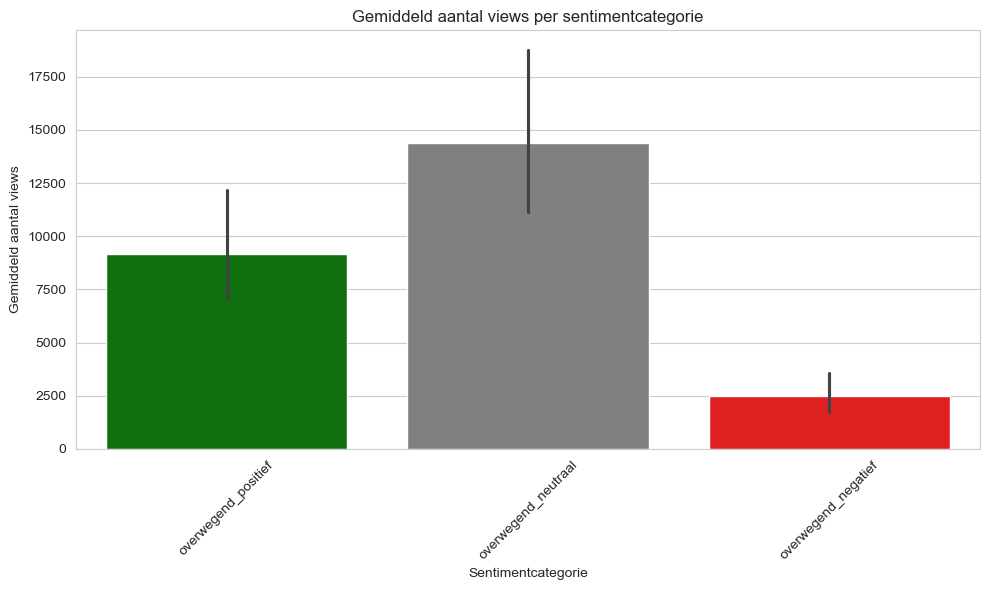

/var/folders/rg/6dz_349s4fs1rhcghq4lk7340000gr/T/ipykernel_4387/4181899294.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_category', y='log_views', data=videos,


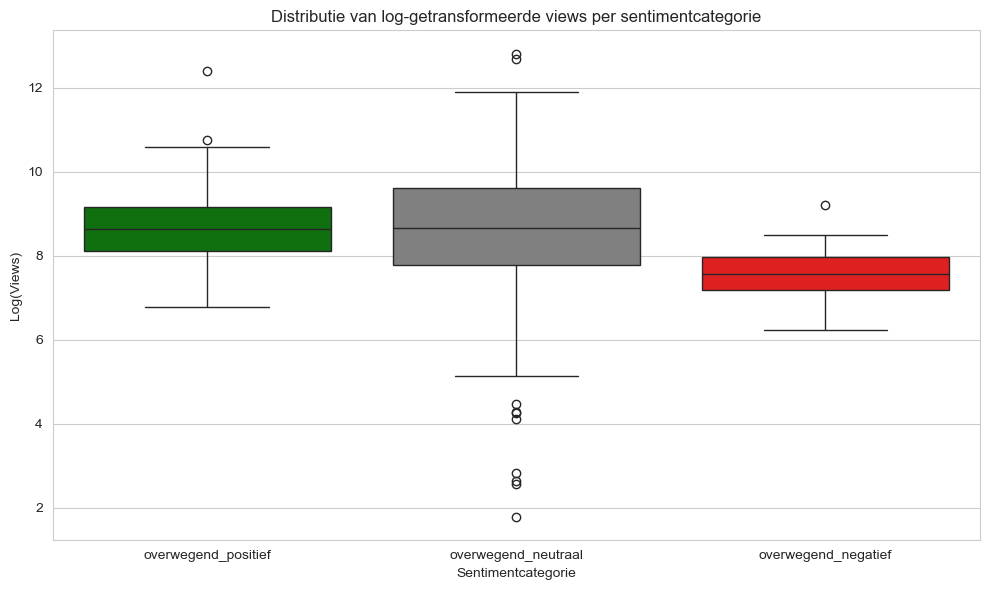

In [78]:
# Analyse van views per sentimentcategorie
views_by_sentiment = videos.groupby('sentiment_category')['views'].agg(['mean', 'median', 'std', 'count'])
print("Views per sentimentcategorie:")
print(views_by_sentiment)

# Visualiseer gemiddelde views per sentimentcategorie
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment_category', y='views', data=videos,
            palette={'overwegend_positief': 'green',
                     'overwegend_neutraal': 'gray',
                     'overwegend_negatief': 'red'},
            ci=95)  # 95% betrouwbaarheidsinterval
plt.title("Gemiddeld aantal views per sentimentcategorie")
plt.xlabel("Sentimentcategorie")
plt.ylabel("Gemiddeld aantal views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternatief: boxplot voor views per categorie (log-getransformeerd)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='log_views', data=videos,
            palette={'overwegend_positief': 'green',
                     'overwegend_neutraal': 'gray',
                     'overwegend_negatief': 'red'})
plt.title("Distributie van log-getransformeerde views per sentimentcategorie")
plt.xlabel("Sentimentcategorie")
plt.ylabel("Log(Views)")
plt.tight_layout()
plt.show()

**Views per sentimentcategorie**

De analyse van het gemiddeld aantal views per sentimentcategorie laat zien dat video's met een *overwegend neutraal* sentiment het hoogste gemiddelde aantal views behalen (~ 14.460), gevolgd door *overwegend positief* (~ 9.148) en *overwegend negatief* (~ 2.491). De mediaan toont een vergelijkbaar patroon.

De barplot illustreert deze verschillen duidelijk, waarbij neutrale video's gemiddeld vaker bekeken worden dan positieve of negatieve video's. De boxplot van de log-getransformeerde views bevestigt dat de spreiding binnen de groepen groot is, met enkele uitschieters naar boven. Positieve en neutrale video's tonen een brede distributie, terwijl de negatieve categorie niet alleen kleiner is in omvang, maar ook een lager gemiddeld bereik heeft.

Deze observaties suggereren dat video's met neutrale of positieve sentimenten gemiddeld beter presteren dan video's met een negatief sentiment. Dit onderstreept het belang van sentiment in het succes van video's, al moet worden opgemerkt dat de spreiding groot blijft en andere factoren ongetwijfeld ook een rol spelen.

In [85]:
# ANOVA-test om te zien of er significante verschillen zijn tussen groepen
from scipy.stats import f_oneway

# Maak groepen op basis van sentimentcategorie
groups = [
    videos[videos['sentiment_category'] == 'overwegend_positief']['log_views'].dropna(),
    videos[videos['sentiment_category'] == 'overwegend_neutraal']['log_views'].dropna(),
    videos[videos['sentiment_category'] == 'overwegend_negatief']['log_views'].dropna()
]

# Controleer of alle groepen voldoende observaties hebben
valid_groups = [group for group in groups if len(group) > 1]
if len(valid_groups) > 1:
    # Voer ANOVA uit
    anova_result = f_oneway(*valid_groups)
    print(f"ANOVA resultaat: F={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4f}")

    if anova_result.pvalue < 0.05:
        print("Er is een significant verschil in views tussen de sentimentcategorieën (p < 0.05)")
    else:
        print("Er is geen significant verschil in views tussen de sentimentcategorieën (p >= 0.05)")
else:
    print("Onvoldoende data in sommige groepen voor ANOVA-test")

# Post-hoc test als ANOVA significant is
if len(valid_groups) > 1 and anova_result.pvalue < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    # Bereid data voor voor Tukey's test
    all_data = np.concatenate(valid_groups)
    all_labels = np.concatenate([
        np.repeat('positief', len(groups[0])) if len(groups) > 0 and len(groups[0]) > 0 else np.array([]),
        np.repeat('neutraal', len(groups[1])) if len(groups) > 1 and len(groups[1]) > 0 else np.array([]),
        np.repeat('negatief', len(groups[2])) if len(groups) > 2 and len(groups[2]) > 0 else np.array([])
    ])

    # Voer Tukey's test uit
    tukey_result = pairwise_tukeyhsd(all_data, all_labels, alpha=0.05)
    print("\nTukey's HSD Post-hoc Test:")
    print(tukey_result)

ANOVA resultaat: F=6.3964, p-value=0.0018
Er is een significant verschil in views tussen de sentimentcategorieën (p < 0.05)

Tukey's HSD Post-hoc Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
negatief neutraal   1.0378 0.0016  0.3356   1.74   True
negatief positief   1.0761 0.0013  0.3586 1.7935   True
neutraal positief   0.0382  0.948 -0.2505 0.3269  False
-------------------------------------------------------


**ANOVA en Tukey's HSD Post-hoc test**

Om te onderzoeken of er significante verschillen bestaan in views tussen de sentimentcategorieën werd een ANOVA uitgevoerd op de log-getransformeerde views. De resultaten zijn als volgt:

- **ANOVA:** F(2, n) = 6.3964, *p* = 0.0018

Deze uitkomst toont een significant verschil tussen minstens twee van de groepen (*p* < 0.05).

Vervolgens werd Tukey's HSD post-hoc test uitgevoerd om te bepalen welke groepen significant van elkaar verschillen:

| Groep 1  | Groep 2  | Mean diff | p-adj  | Reject (significant) |
|----------|----------|-----------|--------|----------------------|
| negatief | neutraal | 1.0378    | 0.0016 | ✅ Ja                |
| negatief | positief | 1.0761    | 0.0013 | ✅ Ja                |
| neutraal | positief | 0.0382    | 0.948  | ❌ Nee               |

De post-hoc resultaten tonen aan dat video's met een *overwegend negatief* sentiment significant minder views behalen dan zowel de *overwegend neutrale* als *overwegend positieve* video's. Er is geen significant verschil tussen de *overwegend neutrale* en *overwegend positieve* categorieën. Dit suggereert dat video's met een negatief sentiment gemiddeld duidelijk minder bereik hebben, terwijl neutrale en positieve video's qua bereik vergelijkbaar zijn.

In [80]:
# T-test tussen positief en negatief sentiment
positive_views = videos[videos['sentiment_category'] == 'overwegend_positief']['log_views'].dropna()
negative_views = videos[videos['sentiment_category'] == 'overwegend_negatief']['log_views'].dropna()

if len(positive_views) > 1 and len(negative_views) > 1:
    t_stat, p_val = stats.ttest_ind(positive_views, negative_views, equal_var=False)
    print(f"\nOnafhankelijke t-test tussen positief en negatief sentiment:")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("Er is een significant verschil in views tussen positief en negatief sentiment (p < 0.05)")
    else:
        print("Er is geen significant verschil in views tussen positief en negatief sentiment (p >= 0.05)")
else:
    print("Onvoldoende data voor t-test tussen positief en negatief sentiment")


Onafhankelijke t-test tussen positief en negatief sentiment:
t-statistic: 6.2709, p-value: 0.0000
Er is een significant verschil in views tussen positief en negatief sentiment (p < 0.05)


**Onafhankelijke t-test tussen positief en negatief sentiment**

Een onafhankelijke t-test werd uitgevoerd om specifiek het verschil in views te onderzoeken tussen video's met een *overwegend positief* en *overwegend negatief* sentiment. De resultaten zijn als volgt:

- **t-statistic:** 6.2709
- **p-waarde:** 0.0000

Deze test bevestigt dat er een **significant verschil** is tussen de twee groepen (*p* < 0.05). Video's met een overwegend positief sentiment behalen gemiddeld significant meer views dan video's met een overwegend negatief sentiment. Dit versterkt de eerdere bevindingen dat negatieve sentimenten een negatief effect lijken te hebben op het bereik van video's.


Gemiddeld sentiment voor populaire vs. minder populaire video's:
Populaire video's (>5,469 views): 0.2060
Minder populaire video's (<=5,469 views): 0.1555


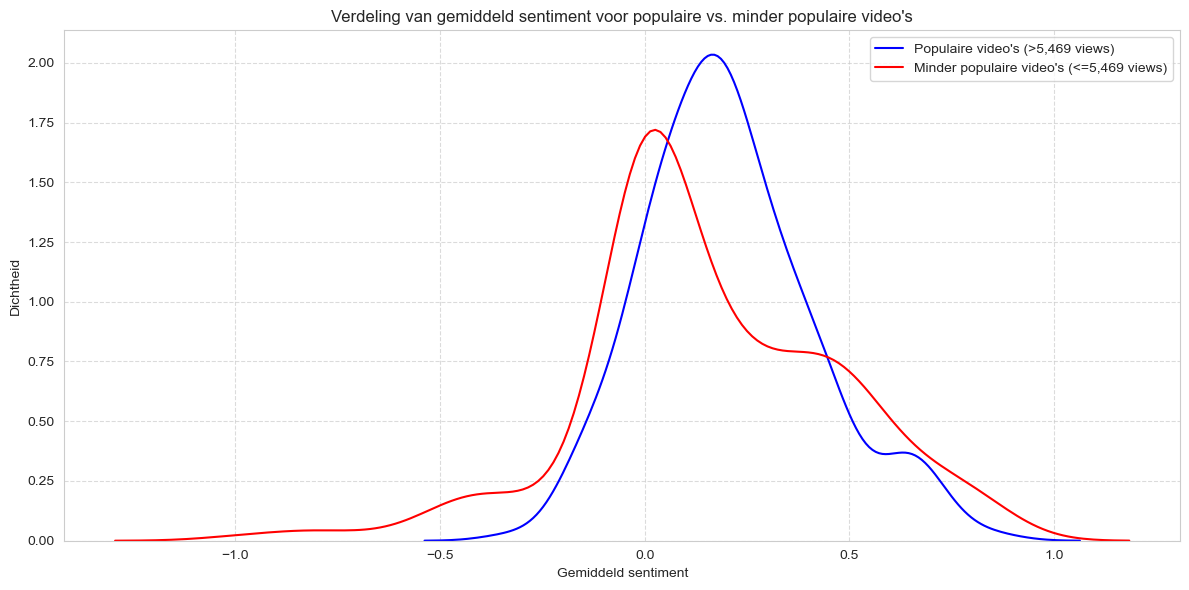


Verschil in sentiment tussen populaire en minder populaire video's:
t-statistic: 2.1195, p-value: 0.0346


In [81]:
# Deel video's in op basis van mediane views (of een ander criterium)
median_views = videos['views'].median()
popular_videos = videos[videos['views'] > median_views]
less_popular_videos = videos[videos['views'] <= median_views]

# Vergelijk gemiddeld sentiment
print("\nGemiddeld sentiment voor populaire vs. minder populaire video's:")
print(f"Populaire video's (>{median_views:,.0f} views): {popular_videos['avg_sentiment'].mean():.4f}")
print(f"Minder populaire video's (<={median_views:,.0f} views): {less_popular_videos['avg_sentiment'].mean():.4f}")

# Visualiseer verschil in sentimentdistributie
plt.figure(figsize=(12, 6))
sns.kdeplot(popular_videos['avg_sentiment'], label=f'Populaire video\'s (>{median_views:,.0f} views)', color='blue')
sns.kdeplot(less_popular_videos['avg_sentiment'], label=f'Minder populaire video\'s (<={median_views:,.0f} views)', color='red')
plt.title('Verdeling van gemiddeld sentiment voor populaire vs. minder populaire video\'s')
plt.xlabel('Gemiddeld sentiment')
plt.ylabel('Dichtheid')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Statistische test voor verschil in gemiddeld sentiment
t_stat, p_val = stats.ttest_ind(
    popular_videos['avg_sentiment'].dropna(),
    less_popular_videos['avg_sentiment'].dropna(),
    equal_var=False
)
print(f"\nVerschil in sentiment tussen populaire en minder populaire video's:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

**Vergelijking tussen populaire en minder populaire video's**

De video's werden opgesplitst op basis van de mediaan van het aantal views (5.469). De groep *populaire video's* (meer dan 5.469 views) behaalde een gemiddeld sentiment van 0.2060, terwijl de *minder populaire video's* (5.469 views of minder) een gemiddeld sentiment van 0.1555 lieten zien.

Een onafhankelijke t-test werd uitgevoerd om het verschil tussen beide groepen te toetsen:

- **t-statistic:** 2.1195
- **p-waarde:** 0.0346

De resultaten tonen een significant verschil (*p* < 0.05) in gemiddeld sentiment tussen populaire en minder populaire video's. De densiteitsplot laat zien dat populaire video's gemiddeld een iets positiever sentiment hebben dan minder populaire video's, hoewel het verschil klein blijft. Dit suggereert dat sentiment mogelijk een rol speelt in het succes van een video, maar dat het effect beperkt is.

In [82]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# Prepare data: drop NaN
group_pos = videos[videos['sentiment_category'] == 'overwegend_positief']['log_views'].dropna()
group_neut = videos[videos['sentiment_category'] == 'overwegend_neutraal']['log_views'].dropna()
group_neg = videos[videos['sentiment_category'] == 'overwegend_negatief']['log_views'].dropna()

# Kruskal-Wallis H-test
kruskal_result = kruskal(group_pos, group_neut, group_neg)
print(f"Kruskal-Wallis H-test: H-statistic = {kruskal_result.statistic:.4f}, p-value = {kruskal_result.pvalue:.4f}")

if kruskal_result.pvalue < 0.05:
    print("Er is een significant verschil tussen de groepen (p < 0.05).")

    # Prepare data for Dunn's test
    all_data = pd.concat([group_pos, group_neut, group_neg])
    all_groups = (
        ['positief'] * len(group_pos) +
        ['neutraal'] * len(group_neut) +
        ['negatief'] * len(group_neg)
    )

    # Dunn's post-hoc test with Bonferroni correction
    dunn_results = sp.posthoc_dunn([group_pos, group_neut, group_neg], p_adjust='bonferroni')
    dunn_results.index = ['positief', 'neutraal', 'negatief']
    dunn_results.columns = ['positief', 'neutraal', 'negatief']
    print("\nDunn's post-hoc test (Bonferroni gecorrigeerd):")
    print(dunn_results)
else:
    print("Er is geen significant verschil tussen de groepen (p >= 0.05).")

Kruskal-Wallis H-test: H-statistic = 20.4531, p-value = 0.0000
Er is een significant verschil tussen de groepen (p < 0.05).

Dunn's post-hoc test (Bonferroni gecorrigeerd):
          positief  neutraal  negatief
positief  1.000000  1.000000  0.000062
neutraal  1.000000  1.000000  0.000019
negatief  0.000062  0.000019  1.000000


**Kruskal-Wallis H-test en Dunn's post-hoc test**

Gezien de niet-normale verdeling van de data werd een Kruskal-Wallis H-test uitgevoerd om verschillen in views tussen de sentimentcategorieën te onderzoeken. De resultaten zijn:

- **Kruskal-Wallis H-test:** H = 20.4531, *p* = 0.0000

Dit wijst op een significant verschil tussen minstens twee van de groepen (*p* < 0.05).

Om te identificeren welke groepen van elkaar verschillen, werd een Dunn's post-hoc test uitgevoerd met Bonferroni-correctie. De resultaten:

|              | positief  | neutraal | negatief |
|--------------|-----------|----------|----------|
| **positief** | 1.000000  | 1.000000 | 0.000064 |
| **neutraal** | 1.000000  | 1.000000 | 0.000019 |
| **negatief** | 0.000064  | 0.000019 | 1.000000 |

De post-hoc resultaten tonen dat de *negatieve* groep significant verschilt van zowel de *positieve* als *neutrale* groepen (*p* < 0.001), terwijl er geen significant verschil is tussen *positief* en *neutraal*. Dit bevestigt het eerdere patroon: video's met een negatief sentiment behalen significant minder views dan de andere categorieën.